# import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)


# import data

In [9]:
path_health_care = '/Users/chenhaoyi/JupyterNotebook/SummerProject/data/health_care_dataset/County_Level_Data_data.csv'

df = pd.read_csv(path_health_care)

df

,State,COUNTY,Peak Case Date,Measure Names,Fips,County ICU Beds,County Staffed Beds,Measure Values,Est Available Ventilators
0,FL,Miami-Dade County,2020-08-30,Days to Ventilator Capacity Failure,12086,"1,279","9,456",NaN,545.0
1,FL,Miami-Dade County,2020-08-30,Days to ICU Capacity Failure,12086,"1,279","9,456",NaN,545.0
2,FL,Miami-Dade County,2020-08-30,Days to Bed Capacity Failure,12086,"1,279","9,456",NaN,545.0
3,FL,Miami-Dade County,2020-08-30,Percent Remaining Vent Capacity,12086,"1,279","9,456",0.905269,545.0
4,FL,Miami-Dade County,2020-08-30,ICU Cases,12086,"1,279","9,456",129.000000,545.0
5,FL,Miami-Dade County,2020-08-30,Ventilator Capacity,12086,"1,279","9,456",1361.750000,545.0
6,FL,Miami-Dade County,2020-08-30,Hospitalized,12086,"1,279","9,456",442.000000,545.0
7,FL,Miami-Dade County,2020-08-30,Latest COVID-19 Cases,12086,"1,279","9,456",25789.000000,545.0
8,FL,Broward County,2020-08-30,Days to Ventilator Capacity Failure,12011,790,"5,791",NaN,293.0
9,FL,Broward County,2020-08-30,Days to ICU Capacity Failure,12011,790,"5,791",NaN,293.0


# manipulation for the date

In [11]:
df_to_unstack = df.drop(columns = ['State', 'Peak Case Date', 'Fips']).fillna(0).loc[:,['COUNTY', 'Measure Names', 'Measure Values']]
df_to_unstack
df_cleaned = df_to_unstack.set_index(['COUNTY','Measure Names']).unstack()
df_cleaned
df_cleaned.columns = df_cleaned.columns.droplevel(0)
df_cleaned.columns.name = None
df_cleaned.reset_index()


df_temp = df.loc[:,['COUNTY','Est Available Ventilators','County ICU Beds','County Staffed Beds']].drop_duplicates('COUNTY','first').reset_index(drop = True)
df_all_info = pd.merge(df_temp,df_cleaned,how = 'left', on = 'COUNTY').sort_values(by = 'COUNTY').reset_index(drop = True)

df_all_info['COUNTY'] = df_all_info['COUNTY'].apply(lambda x : x[:-7])
df_all_info['Ventilator Capacity'] = df_all_info['Ventilator Capacity'].apply(lambda x: round(x))
df_all_info

,COUNTY,Est Available Ventilators,County ICU Beds,County Staffed Beds,Days to Bed Capacity Failure,Days to ICU Capacity Failure,Days to Ventilator Capacity Failure,Hospitalized,ICU Cases,Latest COVID-19 Cases,Percent Remaining Vent Capacity,Ventilator Capacity
0,Alachua,110.0,387,"2,263",0.0,0.0,0.0,13.0,4.0,716.0,0.990692,430
1,Baker,3.0,4,81,0.0,0.0,0.0,1.0,1.0,41.0,0.750000,4
2,Bay,49.0,77,676,0.0,0.0,0.0,4.0,1.0,190.0,0.986711,75
3,Bradford,3.0,4,25,0.0,0.0,0.0,2.0,1.0,61.0,0.750000,4
4,Brevard,125.0,288,"1,867",0.0,0.0,0.0,15.0,5.0,850.0,0.983607,305
5,Broward,293.0,790,"5,791",0.0,0.0,0.0,191.0,56.0,11155.0,0.935223,864
6,Calhoun,2.0,3,15,0.0,0.0,0.0,2.0,1.0,69.0,0.636364,3
7,Charlotte,51.0,51,595,0.0,0.0,0.0,11.0,3.0,587.0,0.934426,46
8,Citrus,30.0,40,332,0.0,0.0,0.0,4.0,1.0,189.0,0.972222,36
9,Clay,55.0,42,459,0.0,0.0,0.0,9.0,3.0,494.0,0.904762,32


Text(0.5, 1.0, '(Ventilator Capacity)')

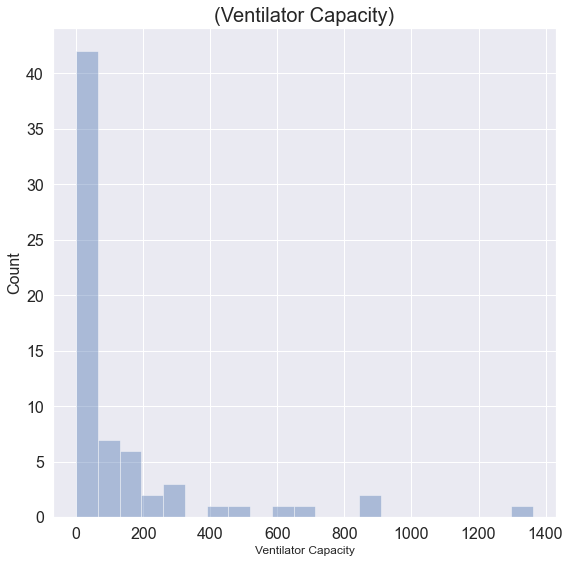

In [12]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
sns.distplot(df_all_info['Ventilator Capacity'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Ventilator Capacity)", fontsize=20)             

# merge with lethality data

In [10]:
# import current cases data
path_current_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-21-2020.csv'
df_current_case = pd.read_csv(path_current_case)

# retrieve Florida data
df_current_florida = df_current_case[df_current_case['Province_State'] == 'Florida'].dropna().reset_index(drop = True)

# retrieve useful data columns from dataset above and doing some manipulation for the dataset
retrieve_list = ['Admin2','Confirmed','Deaths','Active','Case-Fatality_Ratio']
df_current_florida = df_current_florida[retrieve_list]
df_current_florida.rename(columns = {'Admin2':'COUNTY'}, inplace = True)

df_health_care = df_all_info.loc[:,['COUNTY','Est Available Ventilators','Hospitalized','ICU Cases','Percent Remaining Vent Capacity','Ventilator Capacity']]
df_analysis = pd.merge(df_health_care,df_current_florida,how = 'left', on = "COUNTY")
df_analysis_revised = df_analysis[~df_analysis['Case-Fatality_Ratio'].isin([0])]
df_analysis_revised


,COUNTY,Est Available Ventilators,Hospitalized,ICU Cases,Percent Remaining Vent Capacity,Ventilator Capacity,Confirmed,Deaths,Active,Case-Fatality_Ratio
0,Alachua,110.0,13.0,4.0,0.990692,429.75,716,11,705,1.536313
1,Baker,3.0,1.0,1.0,0.750000,4.00,41,4,37,9.756098
2,Bay,49.0,4.0,1.0,0.986711,75.25,190,4,186,2.105263
3,Bradford,3.0,2.0,1.0,0.750000,4.00,61,2,59,3.278689
4,Brevard,125.0,15.0,5.0,0.983607,305.00,850,16,834,1.882353
5,Broward,293.0,191.0,56.0,0.935223,864.50,11155,373,10782,3.343792
6,Calhoun,2.0,2.0,1.0,0.636364,2.75,69,6,63,8.695652
7,Charlotte,51.0,11.0,3.0,0.934426,45.75,587,75,512,12.776831
8,Citrus,30.0,4.0,1.0,0.972222,36.00,189,12,177,6.349206
9,Clay,55.0,9.0,3.0,0.904762,31.50,494,32,462,6.477733


# import population data

In [11]:
url = 'https://www.florida-demographics.com/counties_by_population'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

tr_tag = soup.find_all('tr')
datalist = []
for tr in tr_tag:
    td = tr.find_all('td')
    for i in td:
        datalist.append(i.get_text().strip())

whole = datalist[:-1]
county = whole[1::3]
transform = whole[2::3]

#print(whole)
#print(county)
#print(transform)
def transformtoint(list):
    data = []
    for i in list:
        temp = i.split(',')
        num_temp = ''
        for digit in temp:
            num_temp +=digit
            num = int(num_temp)
        data.append(num)
    return data

county_census = transformtoint(transform)
#print(county_census)

def transformname(list):
    data = []
    for i in list:
        name_temp = i[:-7]
        data.append(name_temp)
    return data

county = transformname(county)

df_population = pd.DataFrame.from_dict({'COUNTY':county,'population':county_census})
df_population = df_population.sort_values(by = 'COUNTY').reset_index(drop = True)

df_analysis_with_pop = pd.merge(df_analysis_revised,df_population,how = 'left', on = "COUNTY")

df_analysis_with_pop['vent_per_10Kpop'] = (df_analysis_with_pop['Ventilator Capacity']/(df_analysis_with_pop['population']))*10000
df_analysis_with_pop['vent_per_confiremed'] = df_analysis_with_pop['Ventilator Capacity'] / df_analysis_with_pop['Confirmed']

df_analysis_with_pop_revised = df_analysis_with_pop[~df_analysis_with_pop['vent_per_confiremed'].isin([0])]
df_analysis_with_pop_revised
#df_nooutlier = df_analysis_with_pop.drop([17])
#df_nooutlier['vent_per_confiremed'].unique()


,COUNTY,Est Available Ventilators,Hospitalized,ICU Cases,Percent Remaining Vent Capacity,Ventilator Capacity,Confirmed,Deaths,Active,Case-Fatality_Ratio,population,vent_per_10Kpop,vent_per_confiremed
0,Alachua,110.0,13.0,4.0,0.990692,429.75,716,11,705,1.536313,263148,16.331114,0.600209
1,Baker,3.0,1.0,1.0,0.750000,4.00,41,4,37,9.756098,27785,1.439626,0.097561
2,Bay,49.0,4.0,1.0,0.986711,75.25,190,4,186,2.105263,182482,4.123694,0.396053
3,Bradford,3.0,2.0,1.0,0.750000,4.00,61,2,59,3.278689,26979,1.482635,0.065574
4,Brevard,125.0,15.0,5.0,0.983607,305.00,850,16,834,1.882353,576808,5.287721,0.358824
5,Broward,293.0,191.0,56.0,0.935223,864.50,11155,373,10782,3.343792,1909151,4.528191,0.077499
6,Calhoun,2.0,2.0,1.0,0.636364,2.75,69,6,63,8.695652,14444,1.903905,0.039855
7,Charlotte,51.0,11.0,3.0,0.934426,45.75,587,75,512,12.776831,176954,2.585418,0.077939
8,Citrus,30.0,4.0,1.0,0.972222,36.00,189,12,177,6.349206,143087,2.515952,0.190476
9,Clay,55.0,9.0,3.0,0.904762,31.50,494,32,462,6.477733,207291,1.519603,0.063765


# correlation matrix

Text(0.5, 1.0, 'Correlatin matrix')

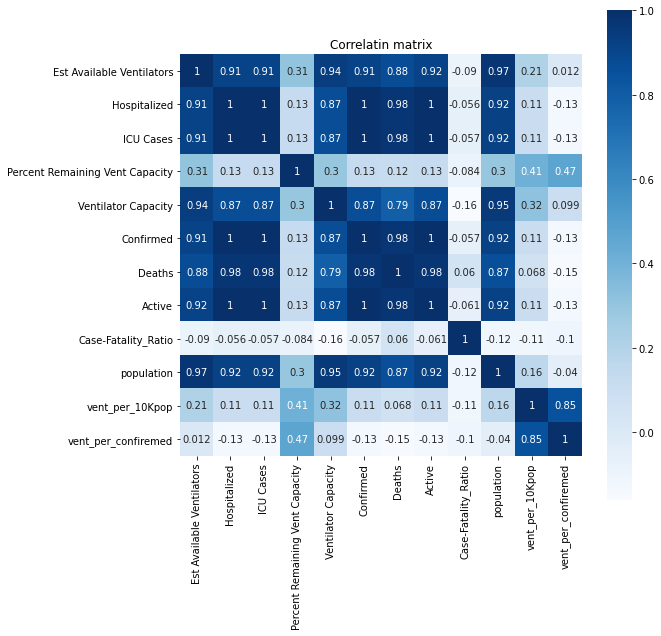

In [12]:
data_cor = df_analysis_with_pop_revised.iloc[:,1:].corr()

#set plot configuration
fig, ax = plt.subplots(figsize=(9, 9)) 
sns.heatmap(data_cor, annot=True, vmax=1, square=True, cmap="Blues")
ax.set_title("Correlatin matrix")

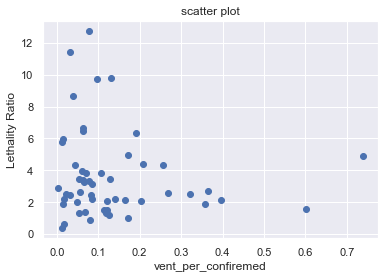

In [13]:
sns.set(style = 'darkgrid')
fig = plt.scatter(df_analysis_with_pop_revised['vent_per_confiremed'],df_analysis_with_pop_revised['Case-Fatality_Ratio'], marker = 'o')
plt.title("scatter plot")
plt.xlabel("vent_per_confiremed")
plt.ylabel("Lethality Ratio")
plt.show()

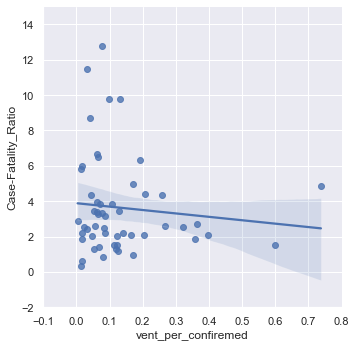

In [14]:
lr = sns.lmplot(x = 'vent_per_confiremed', y = 'Case-Fatality_Ratio', data = df_analysis_with_pop_revised)
lr = lr.set(xlim = (-0.1,0.8), ylim = (-2,15))